In [1]:
from astropy.table import Table

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

# Data

In [2]:
# SDSS DR7 w/ new void catalog
dr7_filename = '../../../data/kias1033_5_MPAJHU_ZdustOS_NSAv012_CMDJan2020_vflag_comoving.txt'

dr7 = Table.read(dr7_filename, format='ascii.commented_header')

In [32]:
dr7.colnames

['index',
 'ra',
 'dec',
 'redshift',
 'Rgal',
 'rabsmag',
 'u_r',
 'imc',
 'aimc',
 'cd',
 'conx1',
 'prmag',
 'epetR',
 'epetRc',
 'iso_a',
 'iso_b',
 'abtrue',
 'phi_iso_deg',
 'vdisp',
 'vdisperr',
 'snmedian',
 'rdev',
 'ab_dev',
 'rexp',
 'ab_exp',
 'mflag',
 'mr',
 'g_r',
 'Ez',
 'vflag',
 'plate',
 'MJD',
 'fiberID',
 'MPA_index',
 'Mstar',
 'BPTclass',
 'flag3727',
 'Z12logOH',
 'Zerr',
 't3',
 'N12logNH',
 'NHerr',
 'logNO',
 'NOerr',
 'sSFR',
 'SFR',
 'NUV_r',
 'u_r_NSA',
 'g_r_NSA',
 'rabsmag_NSA',
 'Mstar_NSA',
 'Ne12logNeH',
 'NeHerr',
 'logNeO',
 'NeOerr',
 'vorvol',
 'CMD_class']

In [5]:
dr7_void = dr7[dr7['vflag'] == 1]
dr7_wall = dr7[dr7['vflag'] == 0]

N_void = len(dr7_void)
N_wall = len(dr7_wall)

## Bin by absolute magnitude (luminosity)

In [23]:
dr7_void_faint = dr7_void[dr7_void['rabsmag_NSA'] >= -17]
dr7_wall_faint = dr7_wall[dr7_wall['rabsmag_NSA'] >= -17]

dr7_void_1717p5 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -17, dr7_void['rabsmag_NSA'] >= -17.5)]
dr7_wall_1717p5 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -17, dr7_wall['rabsmag_NSA'] >= -17.5)]

dr7_void_17p518 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -17.5, dr7_void['rabsmag_NSA'] >= -18)]
dr7_wall_17p518 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -17.5, dr7_wall['rabsmag_NSA'] >= -18)]

dr7_void_1818p5 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -18, dr7_void['rabsmag_NSA'] >= -18.5)]
dr7_wall_1818p5 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -18, dr7_wall['rabsmag_NSA'] >= -18.5)]

dr7_void_18p519 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -18.5, dr7_void['rabsmag_NSA'] >= -19)]
dr7_wall_18p519 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -18.5, dr7_wall['rabsmag_NSA'] >= -19)]

dr7_void_1919p5 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -19, dr7_void['rabsmag_NSA'] >= -19.5)]
dr7_wall_1919p5 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -19, dr7_wall['rabsmag_NSA'] >= -19.5)]

dr7_void_19p520 = dr7_void[np.logical_and(dr7_void['rabsmag_NSA'] < -19.5, dr7_void['rabsmag_NSA'] >= -20)]
dr7_wall_19p520 = dr7_wall[np.logical_and(dr7_wall['rabsmag_NSA'] < -19.5, dr7_wall['rabsmag_NSA'] >= -20)]

dr7_void_bright = dr7_void[dr7_void['rabsmag_NSA'] < -20]
dr7_wall_bright = dr7_wall[dr7_wall['rabsmag_NSA'] < -20]

# Absolute magnitude

In [28]:
Mr_bins = np.arange(-20,-16, 0.5) - 0.25

normalized_bin_counts_void = np.array([len(dr7_void_faint),
                                       len(dr7_void_1717p5),
                                       len(dr7_void_17p518),
                                       len(dr7_void_1818p5),
                                       len(dr7_void_18p519),
                                       len(dr7_void_1919p5),
                                       len(dr7_void_19p520),
                                       len(dr7_void_bright)])/N_void
normalized_bin_counts_wall = np.array([len(dr7_wall_faint),
                                       len(dr7_wall_1717p5),
                                       len(dr7_wall_17p518),
                                       len(dr7_wall_1818p5),
                                       len(dr7_wall_18p519),
                                       len(dr7_wall_1919p5),
                                       len(dr7_wall_19p520),
                                       len(dr7_wall_bright)])/N_wall

<IPython.core.display.Javascript object>


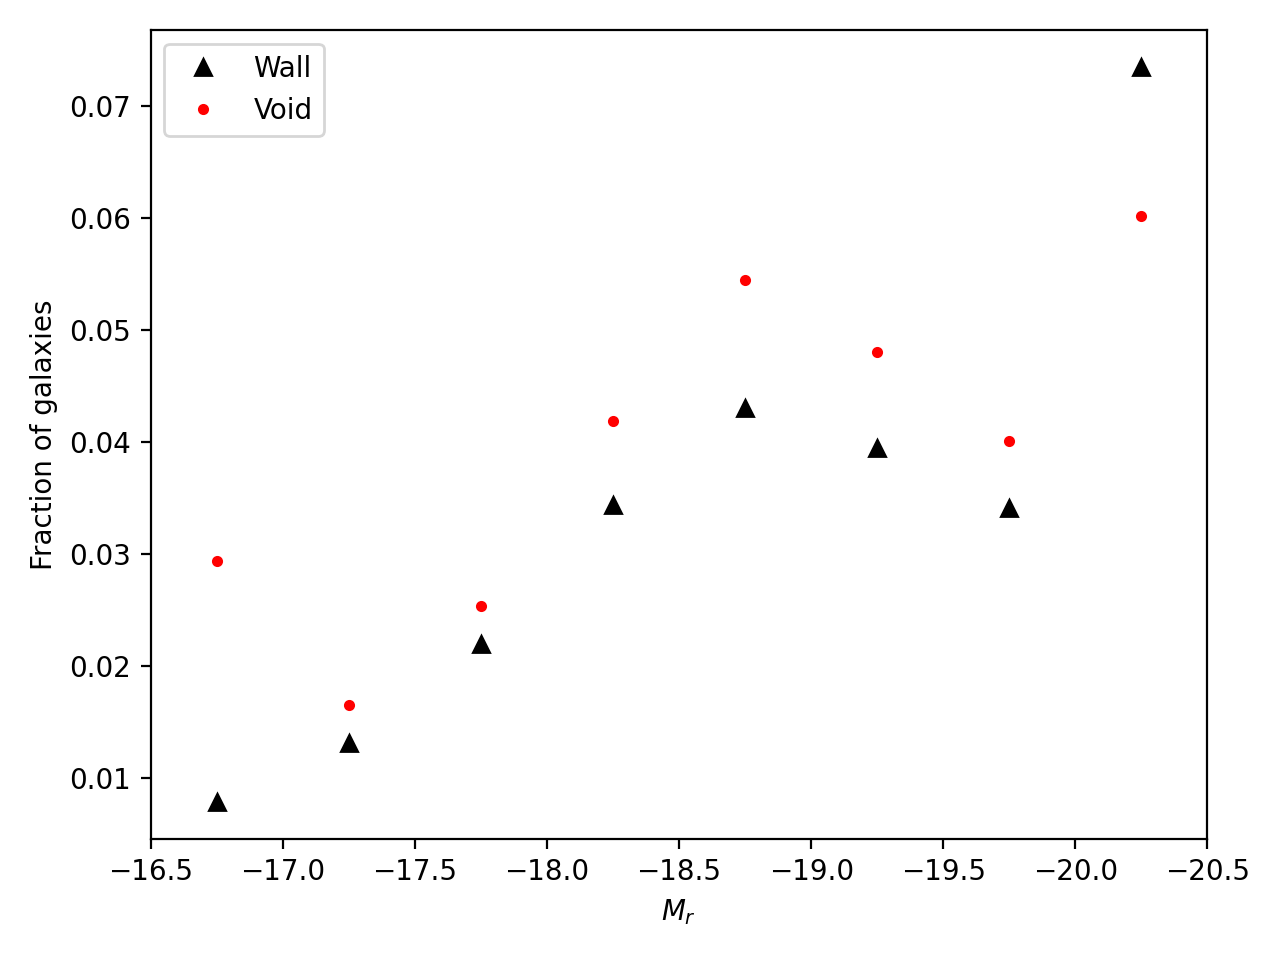

In [30]:
plt.figure()

plt.plot(np.flip(Mr_bins), normalized_bin_counts_wall, 'k^', label='Wall')
plt.plot(np.flip(Mr_bins), normalized_bin_counts_void, 'r.', label='Void')

plt.xlabel('$M_r$')
plt.ylabel('Fraction of galaxies')

plt.xlim((-16.5,-20.5))

plt.legend()

plt.tight_layout();

# Color

In [39]:
ur_void = np.array([np.nanmedian(dr7_void_faint['u_r_NSA']),
                    np.nanmedian(dr7_void_1717p5['u_r_NSA']),
                    np.nanmedian(dr7_void_17p518['u_r_NSA']),
                    np.nanmedian(dr7_void_1818p5['u_r_NSA']),
                    np.nanmedian(dr7_void_18p519['u_r_NSA']),
                    np.nanmedian(dr7_void_1919p5['u_r_NSA']),
                    np.nanmedian(dr7_void_19p520['u_r_NSA']),
                    np.nanmedian(dr7_void_bright['u_r_NSA'])])
ur_wall = np.array([np.nanmedian(dr7_wall_faint['u_r_NSA']),
                    np.nanmedian(dr7_wall_1717p5['u_r_NSA']),
                    np.nanmedian(dr7_wall_17p518['u_r_NSA']),
                    np.nanmedian(dr7_wall_1818p5['u_r_NSA']),
                    np.nanmedian(dr7_wall_18p519['u_r_NSA']),
                    np.nanmedian(dr7_wall_1919p5['u_r_NSA']),
                    np.nanmedian(dr7_wall_19p520['u_r_NSA']),
                    np.nanmedian(dr7_wall_bright['u_r_NSA'])])

<IPython.core.display.Javascript object>


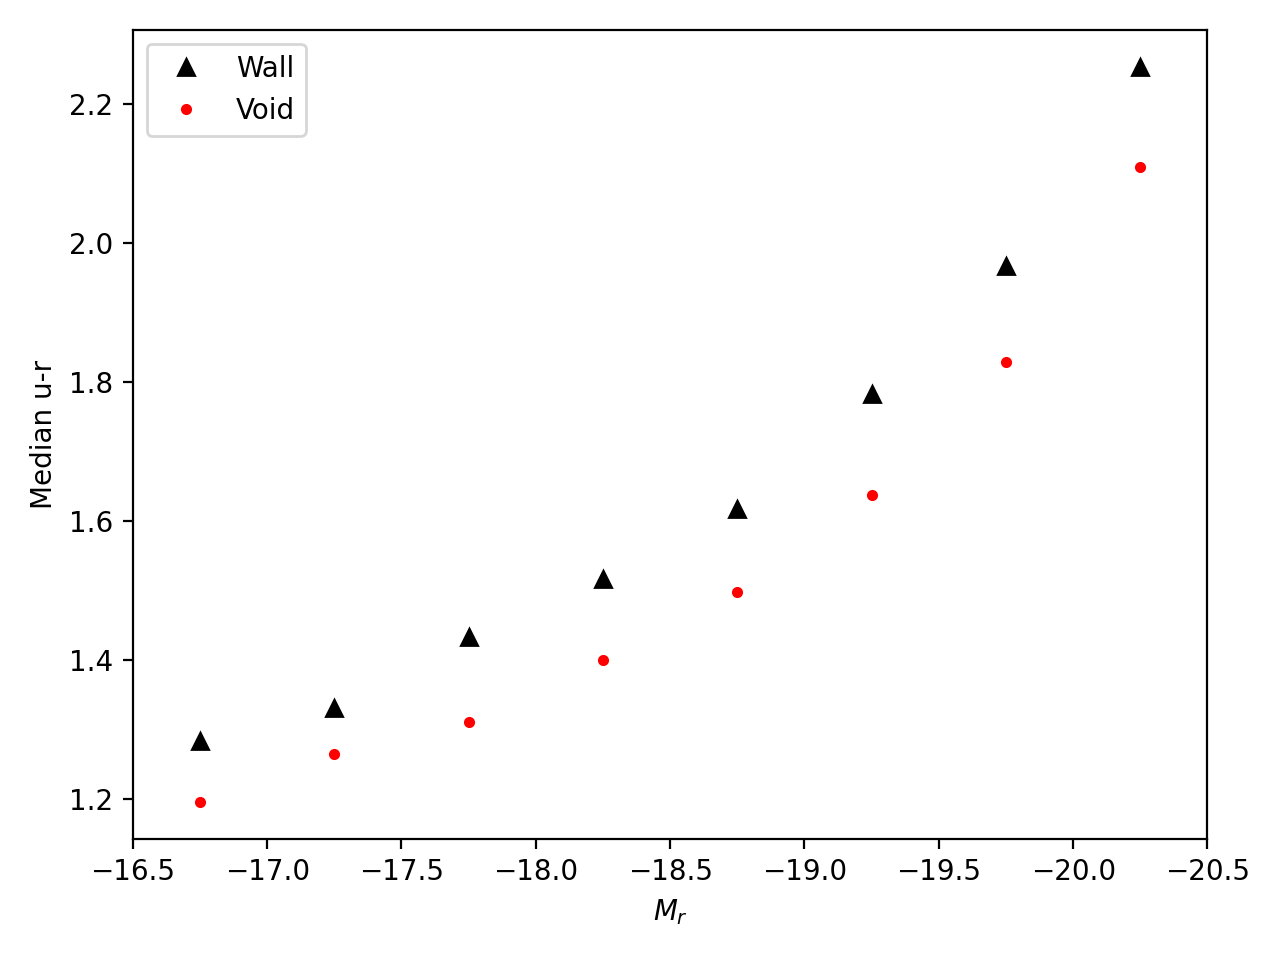

In [37]:
plt.figure()

plt.plot(np.flip(Mr_bins), ur_wall, 'k^', label='Wall')
plt.plot(np.flip(Mr_bins), ur_void, 'r.', label='Void')

plt.xlabel('$M_r$')
plt.ylabel('Median u-r')

plt.xlim((-16.5,-20.5))

plt.legend()

plt.tight_layout();

# SFR

In [42]:
prop = 'sSFR'

sSFR_void = np.array([np.nanmedian(dr7_void_faint[prop]),
                    np.nanmedian(dr7_void_1717p5[prop]),
                    np.nanmedian(dr7_void_17p518[prop]),
                    np.nanmedian(dr7_void_1818p5[prop]),
                    np.nanmedian(dr7_void_18p519[prop]),
                    np.nanmedian(dr7_void_1919p5[prop]),
                    np.nanmedian(dr7_void_19p520[prop]),
                    np.nanmedian(dr7_void_bright[prop])])
sSFR_wall = np.array([np.nanmedian(dr7_wall_faint[prop]),
                    np.nanmedian(dr7_wall_1717p5[prop]),
                    np.nanmedian(dr7_wall_17p518[prop]),
                    np.nanmedian(dr7_wall_1818p5[prop]),
                    np.nanmedian(dr7_wall_18p519[prop]),
                    np.nanmedian(dr7_wall_1919p5[prop]),
                    np.nanmedian(dr7_wall_19p520[prop]),
                    np.nanmedian(dr7_wall_bright[prop])])

<IPython.core.display.Javascript object>


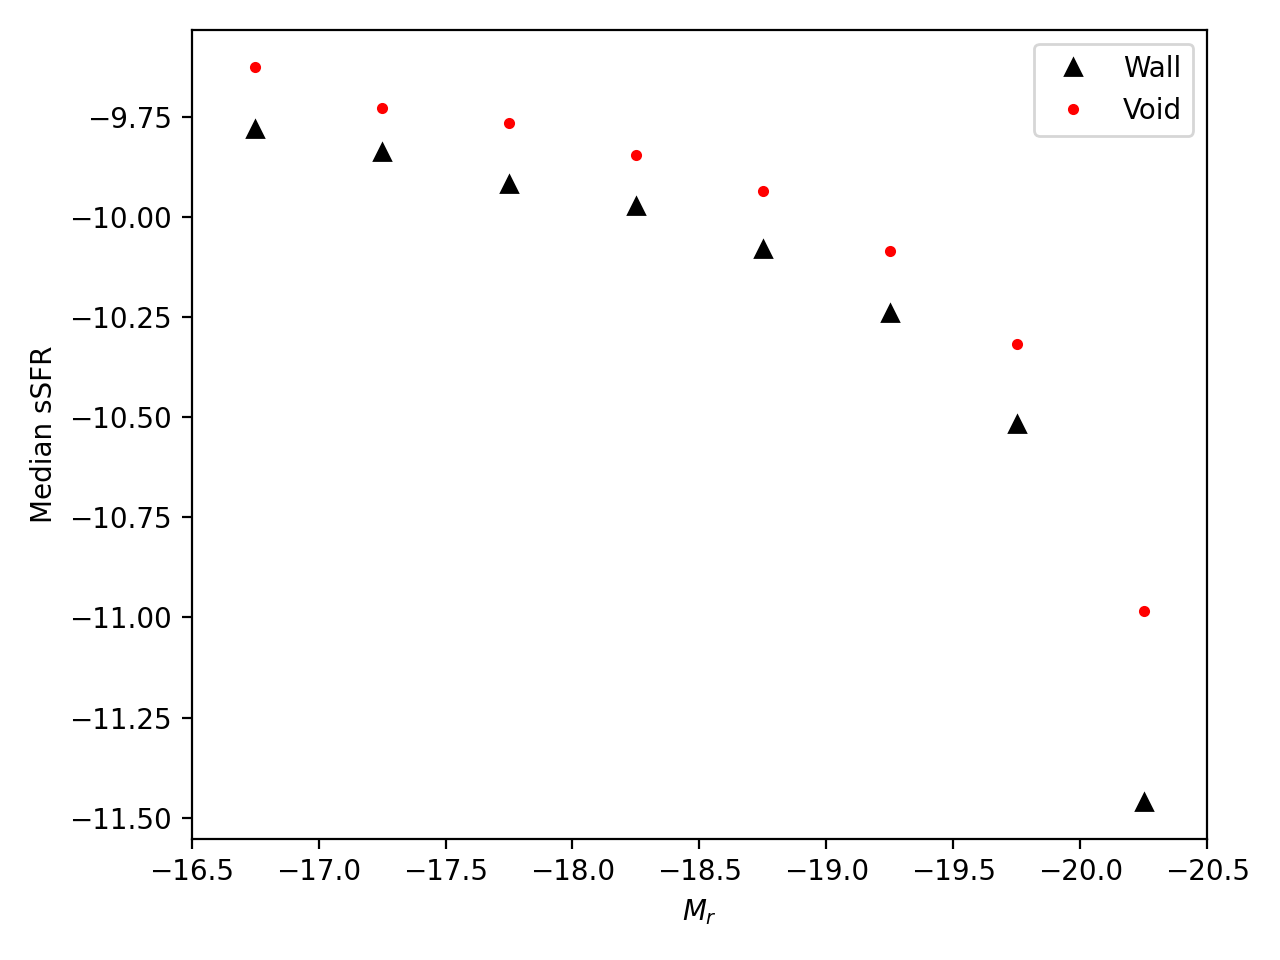

In [43]:
plt.figure()

plt.plot(np.flip(Mr_bins), sSFR_wall, 'k^', label='Wall')
plt.plot(np.flip(Mr_bins), sSFR_void, 'r.', label='Void')

plt.xlabel('$M_r$')
plt.ylabel('Median sSFR')

plt.xlim((-16.5,-20.5))

plt.legend()

plt.tight_layout();